In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import itertools
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
df_play = pd.read_csv('pfl_benchmark_p2.csv',sep=';')
df_play.drop(columns=[df_play.columns[0]],inplace=True)

In [3]:
ubs,lbs = np.array(df_play['UB']),np.array(df_play['LB'])
df_play['rel_gap'] = (ubs-lbs)/np.maximum(1,(np.abs(ubs)+np.abs(lbs))/2)*100

In [4]:
df_play[df_play['repID']==0]

,UB,LB,N,repID,time,certif,d,tau,p,skip_,rel_gap
0,49.444888,4.944489e+01,500,0,235.048893,optimal,2,0.05,2,False,0.000000
1,49.444887,4.944489e+01,500,0,420.811823,optimal,2,0.05,2,True,0.000000
2,24.853895,2.485389e+01,500,0,126.779650,optimal,2,0.15,2,False,0.000000
3,3960.468675,1.188837e+00,500,0,502.046521,optimal_inaccurate,2,0.15,2,True,199.879966
4,12.480915,1.248092e+01,500,0,87.278748,optimal,2,0.25,2,False,0.000000
5,501.687386,-1.621654e-07,500,0,501.992942,optimal_inaccurate,2,0.25,2,True,200.000000


In [10]:
dic_cleaned_results = {'median rel-gap [%]':[],'mean rel-gap [%]':[],'$\\tau$':[],'avg. time [s]':[], 'presolve':[]}

for tau in list(df_play['tau'].unique()):
        for val in df_play['skip_'].unique():
            if val==False:
                dic_cleaned_results['presolve'].append('Yes')
            else:
                dic_cleaned_results['presolve'].append('No')

            sub_df = df_play[(df_play['tau']==tau)&(df_play['skip_']==val)]
            dic_cleaned_results['mean rel-gap [%]'].append(sub_df['rel_gap'].mean())
            dic_cleaned_results['median rel-gap [%]'].append(sub_df['rel_gap'].median())
            dic_cleaned_results['$\\tau$'].append(tau)
            dic_cleaned_results['avg. time [s]'].append(sub_df['time'].mean())

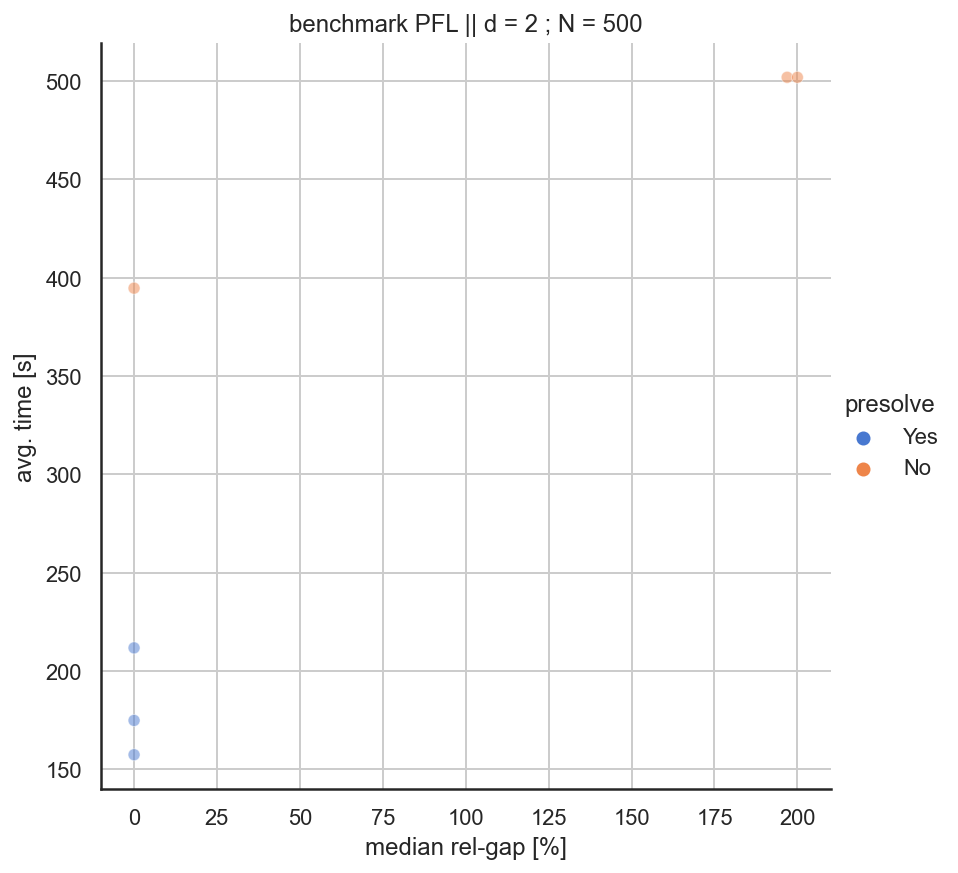

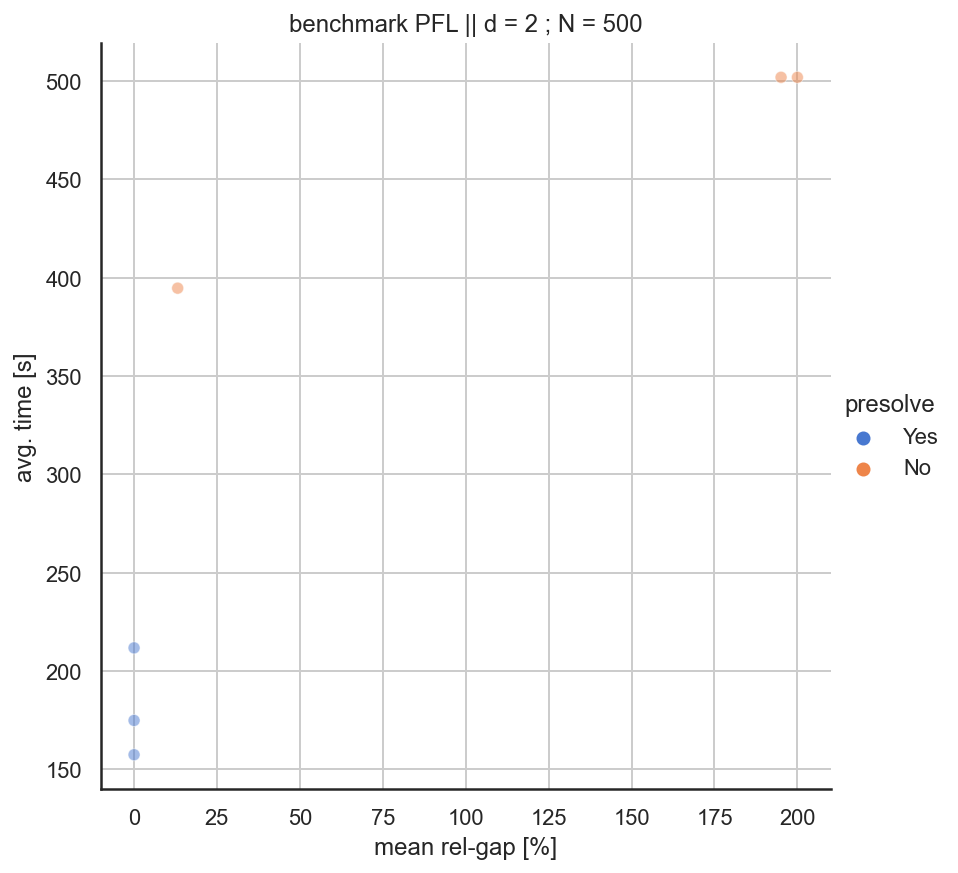

In [11]:
import seaborn as sns
sns.set_theme(style="white")
sns.relplot(x="median rel-gap [%]", y="avg. time [s]", hue="presolve",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=pd.DataFrame(data=dic_cleaned_results))
plt.grid()
plt.title('benchmark PFL || d = '+str(df_play['d'].unique()[0])+' ; N = '+str(df_play['N'].unique()[0]));


sns.relplot(x="mean rel-gap [%]", y="avg. time [s]", hue="presolve",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=pd.DataFrame(data=dic_cleaned_results))
plt.grid()
plt.title('benchmark PFL || d = '+str(df_play['d'].unique()[0])+' ; N = '+str(df_play['N'].unique()[0]));